In [1]:
%cd ..

/home/work/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
# pyro.enable_validation(True)
# torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-3,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 20,
    "factor": 0.5,
    "verbose": True,
})

In [11]:
# optimizer = config.init_obj('optimizer', pyro.optim)

In [12]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader,
                  lr_scheduler=optimizer)

In [13]:
trainer.train()

Train Epoch: 1 [256/54000 (0%)] Loss: 4914.030273
Train Epoch: 1 [4352/54000 (8%)] Loss: -226942.593750
Train Epoch: 1 [8448/54000 (16%)] Loss: -311377.125000
Train Epoch: 1 [12544/54000 (23%)] Loss: -333501.687500
Train Epoch: 1 [16640/54000 (31%)] Loss: -337481.312500
Train Epoch: 1 [20736/54000 (38%)] Loss: -334666.625000
Train Epoch: 1 [24832/54000 (46%)] Loss: -394226.781250
Train Epoch: 1 [28928/54000 (54%)] Loss: -327557.781250
Train Epoch: 1 [33024/54000 (61%)] Loss: -282443.093750
Train Epoch: 1 [37120/54000 (69%)] Loss: -355077.937500
Train Epoch: 1 [41216/54000 (76%)] Loss: -339570.625000
Train Epoch: 1 [45312/54000 (84%)] Loss: -353777.218750
Train Epoch: 1 [49408/54000 (91%)] Loss: -408224.156250
    epoch          : 1
    loss           : -313086.5893483232
    val_loss       : -340989.05961914064
Train Epoch: 2 [256/54000 (0%)] Loss: -417371.968750
Train Epoch: 2 [4352/54000 (8%)] Loss: -315476.625000
Train Epoch: 2 [8448/54000 (16%)] Loss: -360330.437500
Train Epoch: 2 

In [14]:
model.cpu()

VAECategoryModel(
  (_category): CartesianCategory(
    (generator_0): DensityDecoder(
      (neural_layers): Sequential(
        (0): Linear(in_features=64, out_features=96, bias=True)
        (1): PReLU(num_parameters=1)
        (2): Linear(in_features=96, out_features=96, bias=True)
        (3): PReLU(num_parameters=1)
        (4): Linear(in_features=96, out_features=128, bias=True)
      )
      (distribution): StandardNormal()
      (combination_layer): Sequential(
        (0): Linear(in_features=256, out_features=128, bias=True)
        (1): PReLU(num_parameters=1)
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (generator_0_dagger): DensityEncoder(
      (neural_layers): Sequential(
        (0): Linear(in_features=128, out_features=96, bias=True)
        (1): PReLU(num_parameters=1)
        (2): Linear(in_features=96, out_features=96, bias=True)
        (3): PReLU(num_parameters=1)
        (4): Linear(in_features=96, out_features=64, bias=True

In [15]:
import matplotlib.pyplot as plt

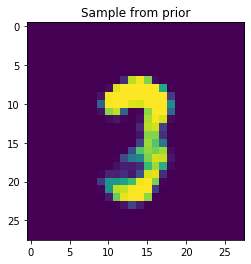

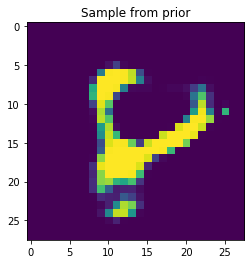

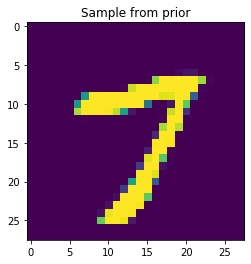

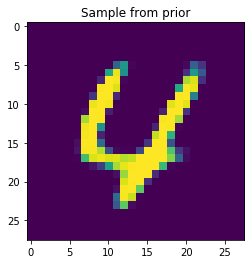

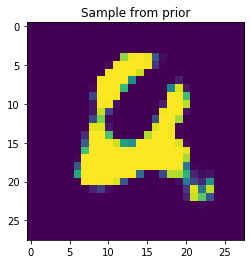

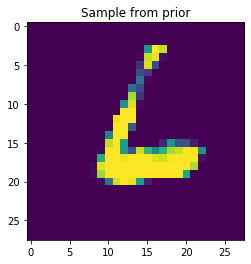

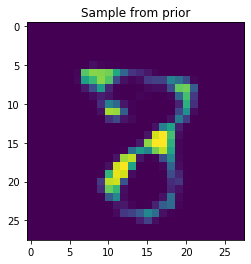

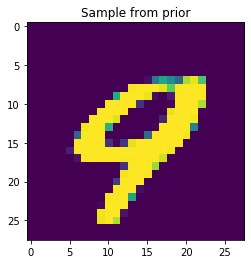

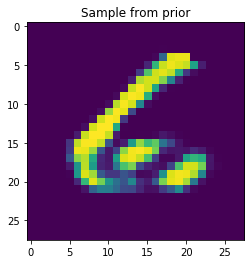

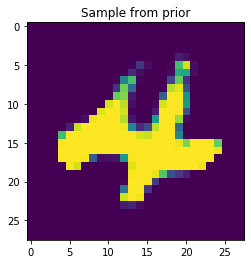

In [16]:
for k in range(10):
    path, sample = model(None)
    sample = sample.view(28, 28).detach().cpu().numpy()
    plt.show()

    plt.title('Sample from prior')
    plt.imshow(sample)
    plt.show()